In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import lib.plotting

In [86]:
lib.plotting.setup_mpl_params_save()

In [16]:
data_generator = pd.read_pickle('~/Desktop/data/2023-11-10_10k_mu_events/analyzed_cut_generator_mu.pkl')
data_detector = pd.read_pickle('~/Desktop/data/2023-11-10_10k_mu_events/analyzed_cut_detector_mu.pkl')

In [0]:
def find_bin_counts(data, binning_variable, bin_edges):
    bin_series = pd.cut(data[binning_variable], bin_edges, include_lowest=True)
    data_by_bin = data.groupby(bin_series)
    counts = data_by_bin.size()
    return counts


In [29]:
bin_edges_costheta_K = np.arange(0,1,0.1)

find_bin_counts(data_generator, 'costheta_K', bin_edges_costheta_K)

/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)


costheta_K
(-0.001, 0.1]    326
(0.1, 0.2]       318
(0.2, 0.3]       320
(0.3, 0.4]       401
(0.4, 0.5]       408
(0.5, 0.6]       461
(0.6, 0.7]       480
(0.7, 0.8]       511
(0.8, 0.9]       581
dtype: int64

In [32]:
bin_edges_costheta_K = np.arange(0,1,0.1)

find_bin_counts(data_detector, 'costheta_K', bin_edges_costheta_K)

/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)


costheta_K
(-0.001, 0.1]    136
(0.1, 0.2]       107
(0.2, 0.3]       113
(0.3, 0.4]       143
(0.4, 0.5]       142
(0.5, 0.6]       165
(0.6, 0.7]       193
(0.7, 0.8]       201
(0.8, 0.9]       264
dtype: int64

In [30]:
def find_bin_middles(bin_edges):
    """Assumes uniform bin widths"""
    num_bins = len(bin_edges)-1
    bin_width = (np.max(bin_edges) - np.min(bin_edges)) / num_bins
    shifted_edges = bin_edges + 0.5*bin_width 
    return shifted_edges[:-1]
    
    

In [31]:
find_bin_middles(bin_edges_costheta_K)

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85])

In [43]:
def calculate_efficiency(data1, data2, variable, bin_edges):
    bin_counts_data1 = find_bin_counts(data1, variable, bin_edges)
    bin_counts_data2 = find_bin_counts(data2, variable, bin_edges)
    return (bin_counts_data1 / bin_counts_data2).values


In [44]:
calculate_efficiency(data_detector, data_generator, 'costheta_K', bin_edges_costheta_K)

/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)
/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)


array([0.41717791, 0.33647799, 0.353125  , 0.35660848, 0.34803922,
       0.35791757, 0.40208333, 0.39334638, 0.45438898, 0.40353698])

In [93]:
def plot_efficiency(data_recon, data_gen, variable, bin_edges, title, xlabel):
    efficiency = calculate_efficiency(data_recon, data_gen, variable, bin_edges)
    bin_middles = find_bin_middles(bin_edges)
    fig, ax = plt.subplots()
    ax.scatter(
        bin_middles, 
        efficiency, 
        label=f'Reconstructed events: {len(data_recon)}\nGenerator events: {len(data_generator)}',
        color='red'
    )
    ax.legend()
    ax.set_ylim(0,1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(r'\varepsilon')
    ax.set_title(title)

In [94]:
def generate_bin_edges(start, stop, num_of_bins):
    bin_size = (stop-start) / num_of_bins
    return np.arange(start, stop+bin_size, bin_size)

In [95]:
bin_edges_costheta_K = generate_bin_edges(0,1,10)

plot_efficiency(data_detector, data_generator, 'costheta_K', bin_edges_costheta_K, r'Efficiency of \cos\theta_K', r'\cos\theta_K')

/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)
/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)


Error in callback <function _draw_all_if_interactive at 0x10f920fe0> (for post_execute):


RuntimeError: latex was not able to process the following string:
b'\\\\varepsilon'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpm9j1_h6z 5f5b5e775a54e724d2b5598235807c51.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./5f5b5e775a54e724d2b5598235807c51.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/physics/physics.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsopn.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
No file 5f5b5e775a54e724d2b5598235807c51.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.30 {\rmfamily \varepsilon
                           }%
No pages of output.
Transcript written on tmpm9j1_h6z/5f5b5e775a54e724d2b5598235807c51.log.




RuntimeError: latex was not able to process the following string:
b'\\\\varepsilon'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpigh68fnw 5f5b5e775a54e724d2b5598235807c51.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./5f5b5e775a54e724d2b5598235807c51.tex
LaTeX2e <2022-11-01> patch level 1
L3 programming layer <2023-02-22>
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/article.cls
Document Class: article 2022/07/02 v1.4n Standard LaTeX document class
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2023/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2023/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/physics/physics.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3kernel/expl3.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsmath.sty
For additional information on amsmath, use the `?' option.
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amstext.sty
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsgen.sty))
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsbsy.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/amsmath/amsopn.sty)))
(/usr/local/texlive/2023/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2023/texmf-dist/tex/latex/base/textcomp.sty)
No file 5f5b5e775a54e724d2b5598235807c51.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips
! Missing $ inserted.
<inserted text> 
                $
l.30 {\rmfamily \varepsilon
                           }%
No pages of output.
Transcript written on tmpigh68fnw/5f5b5e775a54e724d2b5598235807c51.log.




<Figure size 1600x1000 with 1 Axes>

/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)
/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)


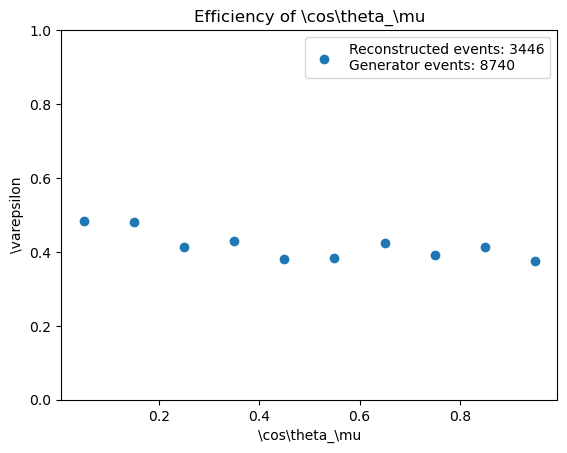

In [79]:
bin_edges_costheta_mu = generate_bin_edges(0,1,10)

plot_efficiency(data_detector, data_generator, 'costheta_mu', bin_edges_costheta_mu, r'Efficiency of \cos\theta_\mu', r'\cos\theta_\mu')

/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)
/var/folders/vh/v012fjpd4b7_6smk23sclbqm0000gp/T/ipykernel_2768/1368853449.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_by_bin = data.groupby(bin_series)


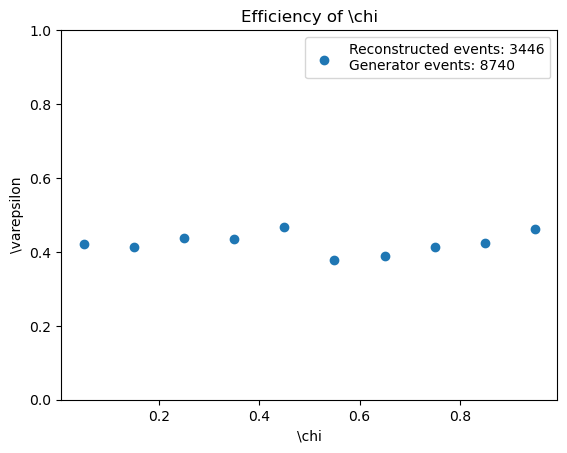

In [81]:
bin_edges_chi = generate_bin_edges(0,1,10)

plot_efficiency(data_detector, data_generator, 'chi', bin_edges_chi, r'Efficiency of \chi', r'\chi')